In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone 'https://github.com/wrjgold/BrainhackCV.git'

In [3]:
import os
os.chdir('BrainhackCV/Object Detection')

Create the file directory for the dataset

In [4]:
!mkdir 'datasets'
!mkdir 'datasets/labels'
!mkdir 'datasets/images'


In [ ]:
!unzip "/content/drive/MyDrive/Brainhack/train.zip" -d "datasets/images/trainSet"

!unzip "/content/drive/MyDrive/Brainhack/train_labels.zip" -d "datasets/labels/trainSet"

!unzip "/content/drive/MyDrive/Brainhack/val.zip" -d "datasets/images/valSet"

!unzip "/content/drive/MyDrive/Brainhack/val_labels.zip" -d "datasets/labels/valSet"

!unzip "/content/drive/MyDrive/Brainhack/test.zip" -d "datasets/images/testSet"

!unzip "/content/drive/MyDrive/Brainhack/suspect.zip" -d "datasets/images/suspect"

# Training the YOLOv8 model for Object Detection

In [ ]:
!pip install ultralytics #install ultralytics for yolov8

In [ ]:
!python3 reannotate.py #reannotates class labels for train and val to 0

In [ ]:
from ultralytics import YOLO

# Load a model
# model = YOLO("yolov8n.yaml")  # build a new model from scratch
yolov8_model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

# Use the model
yolov8_model.train(data="CV_dataset.yaml", epochs=50)  # train the model
# metrics = model.val()  # evaluate model performance on the validation set
# success = model.export(format="onnx")  # export the model to ONNX format
# metrics = model.val(data="CV_val_dataset.yaml") #validate on train set

In [ ]:
#results = yolov8_model.predict(source="datasets/images/testSet", save=True) #testing against test set

In [9]:
os.chdir('..')

# Training the Siamese Network for reID

In [ ]:
!unzip "/content/drive/MyDrive/Brainhack/train.zip" -d "train_images"

!unzip "/content/drive/MyDrive/Brainhack/train_labels.zip" -d "train_labels"

!unzip "/content/drive/MyDrive/Brainhack/val.zip" -d "val_images"

!unzip "/content/drive/MyDrive/Brainhack/val_labels.zip" -d "val_labels"

!unzip "/content/drive/MyDrive/Brainhack/test.zip" -d "test_images"

!unzip "/content/drive/MyDrive/Brainhack/suspects.zip" -d "suspects"

In [11]:
train_images_path = 'train_images'
train_labels_path = 'train_labels'
val_images_path = 'val_images'
val_labels_path = 'val_labels'

In [12]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [13]:
import os

train_crops_path = "train_crops"
num_plushies = 200
os.mkdir(train_crops_path)

for i in range(num_plushies):
    os.mkdir(os.path.join(train_crops_path, str(i)))

In [14]:
val_crops_path = "val_crops"
num_plushies = 10
os.mkdir(val_crops_path)

for i in range(num_plushies):
    os.mkdir(os.path.join(val_crops_path, str(i)))

# Crop the plushie from images using bounding boxes


In [15]:
import cv2
import numpy as np
import pandas as pd
import os

images_path = train_images_path
labels_path = train_labels_path
annotated_images_path = train_crops_path


for label_name in os.listdir(labels_path):
    if label_name[-4:] != ".txt":
        continue
    image_name = label_name[:-4] + ".png"
    # print("Checking", image_name)

    image_path = os.path.join(images_path, image_name)
    label_path = os.path.join(labels_path, label_name)

    df = pd.read_csv(label_path, delim_whitespace=True, header=None)
    df.columns = ["cat", "xc", "yc", "w", "h"]

    img = cv2.imread(image_path)
    img_h, img_w = img.shape[:2]

    for i in range(df.shape[0]):
        bb = df.iloc[i]
        cat = str(int(bb["cat"]))
        tl = (int((bb["xc"] - bb["w"]/2) * img_w), int((bb["yc"] - bb["h"]/2) * img_h))
        br = (int((bb["xc"] + bb["w"]/2) * img_w), int((bb["yc"] + bb["h"]/2) * img_h))

        cropped_img = img[tl[1]:br[1], tl[0]:br[0]]
        annotated_img_name = f"{cat}_{len(os.listdir(os.path.join(annotated_images_path, cat)))}.png"
        cv2.imwrite(os.path.join(annotated_images_path, cat, annotated_img_name), cropped_img)


In [16]:
import cv2
import numpy as np
import pandas as pd
import os

images_path = val_images_path
labels_path = val_labels_path
annotated_images_path = val_crops_path


for label_name in os.listdir(labels_path):
    if label_name[-4:] != ".txt":
        continue
    image_name = label_name[:-4] + ".png"
#     print("Checking", image_name)

    image_path = os.path.join(images_path, image_name)
    label_path = os.path.join(labels_path, label_name)

    df = pd.read_csv(label_path, delim_whitespace=True, header=None)
    df.columns = ["cat", "xc", "yc", "w", "h"]

    img = cv2.imread(image_path)
    img_h, img_w = img.shape[:2]

    for i in range(df.shape[0]):
        bb = df.iloc[i]
        cat = str(int(bb["cat"]))
        tl = (int((bb["xc"] - bb["w"]/2) * img_w), int((bb["yc"] - bb["h"]/2) * img_h))
        br = (int((bb["xc"] + bb["w"]/2) * img_w), int((bb["yc"] + bb["h"]/2) * img_h))

        cropped_img = img[tl[1]:br[1], tl[0]:br[0]]
        annotated_img_name = f"{cat}_{len(os.listdir(os.path.join(annotated_images_path, cat)))}.png"
        cv2.imwrite(os.path.join(annotated_images_path, cat, annotated_img_name), cropped_img)


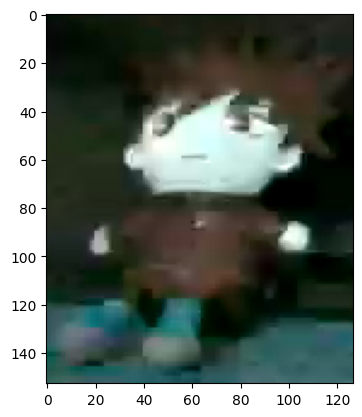

In [17]:
image = cv2.imread(f'{train_crops_path}/1/1_22.png')
plt.imshow(image)

# Creating LFW file format for labelling matches and mismatches

# Creating LFW File for Triplet Loss
class1 anchor positive class2 negative <br>
1 image_0001 image_0010 26 image_0009

In [ ]:
import os
import random

counts = {}

crops_path = train_crops_path
num_plushies = 200

for i in range(num_plushies):
    counts[i] = len(os.listdir(os.path.join(crops_path, str(i))))
print(counts)

lines = []

def add_triplet(plushie, anchor, positive, plushie1, negative):
    line = f"{plushie} {anchor} {positive} {plushie1} {negative}\n"
    lines.append(line)


#hyperparameter
len_data = 1000

for i in range(len_data):
    # print(i)
    plushie = random.choice(list(counts.keys()))
    plushie1 = random.choice(list(counts.keys()))

    while plushie == plushie1:
      plushie1 = random.choice(list(counts.keys()))

    anchor_num, positive_num, negative_num = random.randrange(counts[plushie]), random.randrange(counts[plushie]), random.randrange(counts[plushie1])

    while not (os.path.exists(f"{crops_path}/{plushie}/{plushie}_{anchor_num}.png") and os.path.exists(f"{crops_path}/{plushie}/{plushie}_{positive_num}.png") and os.path.exists(f"{crops_path}/{plushie1}/{plushie1}_{negative_num}.png")):
        print(anchor_num, positive_num, plushie, negative_num, plushie1)
        anchor_num, positive_num, negative_num = random.randrange(counts[plushie]), random.randrange(counts[plushie]), random.randrange(counts[plushie1])
    
    add_triplet(plushie, anchor_num, positive_num, plushie1, negative_num)


f = open("plushie_pairs_train.txt", "a")
f.writelines(lines)
f.close()

# LFW for Validation Set Triplet Loss

In [ ]:
import os
import random

counts = {}

crops_path = val_crops_path
num_plushies = 10

for i in range(num_plushies):
    counts[i] = len(os.listdir(os.path.join(crops_path, str(i))))
print(counts)

lines = []

def add_triplet(plushie, anchor, positive, plushie1, negative):
    line = f"{plushie} {anchor} {positive} {plushie1} {negative}\n"
    lines.append(line)


#hyperparameter
len_data = 50

for i in range(len_data):
    # print(i)
    plushie = random.choice(list(counts.keys()))
    plushie1 = random.choice(list(counts.keys()))

    while plushie == plushie1:
      plushie1 = random.choice(list(counts.keys()))

    anchor_num, positive_num, negative_num = random.randrange(counts[plushie]), random.randrange(counts[plushie]), random.randrange(counts[plushie1])

    while not (os.path.exists(f"{crops_path}/{plushie}/{plushie}_{anchor_num}.png") and os.path.exists(f"{crops_path}/{plushie}/{plushie}_{positive_num}.png") and os.path.exists(f"{crops_path}/{plushie1}/{plushie1}_{negative_num}.png")):
        print(anchor_num, positive_num, plushie, negative_num, plushie1)
        anchor_num, positive_num, negative_num = random.randrange(counts[plushie]), random.randrange(counts[plushie]), random.randrange(counts[plushie1])
    
    add_triplet(plushie, anchor_num, positive_num, plushie1, negative_num)


f = open("plushie_pairs_val.txt", "a")
f.writelines(lines)
f.close()

# Helper Function

In [20]:
import torch
import matplotlib.pyplot as plt

def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
    
def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

def show_img(img1, img2):
    axs = plt.figure(figsize=(9, 9)).subplots(1, 2)
    axs[0].imshow(img1)
    axs[1].imshow(img2)


def accuracy(preds, labels):
    preds = torch.flatten(preds)
    return torch.sum(preds == labels).item() / len(labels)


class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
    
    def __iter__(self):
        for batch in self.dl:
            yield to_device(batch, self.device)
    
    def __len__(self):
        return len(self.dl)

# Transforming the Data
Resizing the images and preprocessing

In [21]:
import torchvision.transforms as tt
import cv2

class BGR2RGB:
    def __call__(self, image):
        #image = image.numpy()
        #print(f'type of image {type(image)}')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #image = torch.from_numpy(image)
        return image

class SquarePad:
    def __call__(self, image):
        max_wh = max(image.shape[:2])
        p_left, p_top = [(max_wh - s) // 2 for s in image.shape[:2]]
        p_right, p_bottom = [max_wh - (s+pad) for s, pad in zip(image.shape[:2], [p_left, p_top])]
        return cv2.copyMakeBorder(image, p_top, p_bottom, p_left, p_right, cv2.BORDER_CONSTANT, None, value = 0)


class Resize():
    def __init__(self, output_size=(128, 128)):
        assert isinstance(output_size, (tuple))
        self.output_size = output_size

    def __call__(self, image):
        return cv2.resize(image, self.output_size, interpolation = cv2.INTER_LINEAR)

class Transforms:
    def __init__(self):
        self.transform = tt.Compose([BGR2RGB(), 
                        SquarePad(),
                        Resize((128, 128)),
                        tt.ToTensor(),
                        tt.Normalize(0, 0.5)])

    def __call__(self, image):
        return self.transform(image)
    

# Creating the Model

# MODEL FOR TRIPLET LOSS

In [22]:
from torchvision.models import resnet50, ResNet50_Weights
from torch import cat
import torch.nn as nn

class SiameseNetwork(nn.Module):
    """
        https://github.com/pytorch/examples/tree/main/siamese_network

        BCE Loss
    """
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.resnet = resnet50(ResNet50_Weights.DEFAULT)

        for ct, child in enumerate(self.resnet.children()):
            if ct < 6:
                for param in child.parameters():
                    param.requires_grad = False


        self.fc_in_features = self.resnet.fc.in_features
        
        # remove the last layer of resnet18 (linear layer which is before avgpool layer)
        self.resnet = nn.Sequential(*(list(self.resnet.children())[:-1]))

        # add linear layers to compare between the features of the two images
        self.fc = nn.Sequential(
            nn.Linear(self.fc_in_features, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, 1), #MIGHT WANT A MORE COMPLEX VECTOR OUTPUT
        )


    def get_embeddings(self, x):
        output = self.resnet(x)
        output = output.view(output.size()[0], -1)
        return output

    def forward(self, input1, input2, input3=None):
        output1 = self.get_embeddings(input1)
        output1 = self.fc(output1)
        output2 = self.get_embeddings(input2)
        output2 = self.fc(output2)

        #for training
        if input3 is not None:
          output3 = self.get_embeddings(input3)
          output3 = self.fc(output3)
        else:
          output3 = None
        #output = cat((output1, output2), 1)
        #output = self.fc(output) #the output of the Siamese Network is a number;
        
        #return output
        return output1, output2, output3

# Creating Dataset for Triplet Loss

In [23]:
import os
import matplotlib.pyplot as plt

from PIL import Image
import cv2

from torch.utils.data import Dataset

class PlushieTrainDataset(Dataset):
    
    def __init__(self, filepath, img_dir, transform=None):
        self.samples = []
        self.img_dir = img_dir
        self.transform = transform

        with open(filepath, 'r') as f:
            self.samples = [line.strip() for line in f]

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, i):
        line = self.samples[i].split()
        anchor_name, anchor_num, positive_num, negative_name, negative_num = line
        
        anchor = cv2.imread(os.path.join(self.img_dir, str(anchor_name), f"{anchor_name}_{anchor_num}.png"))
        positive = cv2.imread(os.path.join(self.img_dir, anchor_name, f"{anchor_name}_{positive_num}.png"))
        negative = cv2.imread(os.path.join(self.img_dir, negative_name, f"{negative_name}_{negative_num}.png"))
        
        if self.transform:
            anchor = self.transform(anchor)
            positive = self.transform(positive)
            negative = self.transform(negative)

        return anchor, positive, negative


# Training the Model

Contrastive Loss

In [24]:
import numpy as np
import torch
import torch.nn.functional as F

def infer(model, img, target, transform = None):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    if transform is not None:
      output1, output2 = transform(img).unsqueeze(0), transform(target).unsqueeze(0)
    else:
      output1, output2 = img, target
    #generate the embedding vectors using loaded model
    output1,output2,_ = model(output1.to(device),output2.to(device)) 

    #calculating euclidean distance and determining if match
    euclidean_distance = F.pairwise_distance(output1, output2)
    #print(f'eucl {euclidean_distance}')

    pred = torch.Tensor(np.array([1 if dist < 1 else 0 for dist in euclidean_distance]))

    return pred, euclidean_distance

# TRIPLET LOSS

Triplet Loss

In [ ]:
def loss_batch(model, loss_func, anchor, positive=None, negative=None, opt=None, metric=None): # Update model weights and return metrics given xb, yb, model
    
    

    #if it is in evaluation phase, no need to calculate triplet loss
    metric_result = None
    if metric is not None:
        pos_pred, _ = infer(model, anchor, positive) #ISSUE -> RESULT IS AN INTEGER, MIGHT BE DUE TO NUMPY CONVERSION
        pos_pred = pos_pred.cuda()
        neg_pred, _ = infer(model, anchor, negative) #ISSUE -> RESULT IS AN INTEGER, MIGHT BE DUE TO NUMPY CONVERSION
        neg_pred = neg_pred.cuda()
        result = torch.cat((pos_pred,neg_pred)).cuda()
        pos_label = torch.from_numpy(np.ones(len(positive)))
        neg_label = torch.from_numpy(np.zeros(len(negative)))
        label = torch.cat((pos_label, neg_label)).cuda()
        #print(f'results {result}') #ISSUE WITH RESULT -> RESULT IS AN INTEGER
        metric_result = metric(result, label)


    preds = model(anchor, positive, negative)
    loss = loss_func(preds[0], preds[1], preds[2]) #triplet loss

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(anchor), metric_result


def fit(epochs, model, loss_func, train_dl, val_dl, opt_func=torch.optim.SGD, lr=0.01, decay = 0.00001, early_stopper=None, metric=None):
    train_losses, val_losses, val_metrics = [] , [], []
    
    opt = opt_func(model.parameters(), lr=lr, weight_decay = decay)
    earlyStopper = early_stopper(patience=5, min_delta=0.01)
    scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=10, gamma=0.0005)
    for epoch in range(1, epochs+1):
        model.train() # Setting for pytorch - training mode
        for anchor,positive,negative in train_dl:
            train_loss, _, _ = loss_batch(model, loss_func, anchor, positive=positive, negative=negative, opt=opt) # update weights
            print(f'train loss{train_loss}')
        scheduler.step()    
        model.eval() # Setting - eval mode
        val_loss, total, val_metric = evaluate(model, loss_func, val_dl, metric)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_metrics.append(val_metric)
        
        if metric is None:
            print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}".format(
            epoch, train_loss, val_loss))
        else:
            print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_{}: {:.4f}".format(
            epoch, train_loss, val_loss, metric.__name__, val_metric))
        if earlyStopper.early_stop(val_loss):             
            break   
    return train_losses, val_losses, val_metrics


def evaluate(model, loss_func, val_dl, metric=None):
    with torch.no_grad():
        results = [loss_batch(model, loss_func, anchor, positive=positive, negative=negative, metric=metric) for anchor, positive, negative in val_dl]
        
        losses, nums, metrics = zip(*results)
        total = np.sum(nums)
        
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        
        avg_metric = None
        if metric is not None:
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
            
        print(f'validation loss {avg_loss}')
        
        return avg_loss, total, avg_metric

class EarlyStopper:
    def __init__(self, patience=1, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = np.inf

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

train_filepath = "plushie_pairs_train.txt"
train_img_dir = train_crops_path
val_filepath = "plushie_pairs_val.txt"
val_img_dir = val_crops_path
train_bs = 256
test_bs = 32
num_epochs = 15
lr = 0.005
weight_decay = 0.0001 #regularisation

torch.autograd.set_detect_anomaly(True)

transform = Transforms()
train_dataset = PlushieTrainDataset(filepath=train_filepath, img_dir=train_img_dir, transform=transform)
valid_dataset = PlushieTrainDataset(filepath=val_filepath, img_dir=val_img_dir, transform=transform)
network = SiameseNetwork()


print("The length of Train set is {}".format(len(train_dataset)))
print("The length of Valid set is {}".format(len(valid_dataset)))

train_dl = torch.utils.data.DataLoader(train_dataset, batch_size=train_bs, shuffle=True, num_workers=4)
val_dl = torch.utils.data.DataLoader(valid_dataset, batch_size=test_bs, shuffle=True, num_workers=4)

device = get_default_device()
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(network, device)

criterion = torch.nn.TripletMarginLoss()
optimizer = torch.optim.Adam
early_stopper = EarlyStopper


train_losses, val_losses, val_metrics = fit(num_epochs, network, criterion, 
                                        train_dl, val_dl, optimizer, lr, weight_decay, early_stopper, accuracy)

torch.save(network.state_dict(), 'reid_model_triplet5.pt')

In [ ]:
import torch
import cv2
import csv
import pandas as pd

import os
from ultralytics import YOLO

yolo_model = yolov8_model #loading trained YOLO

reid_model = network

submission_list = []
test_dir = "test_images"
suspect_dir = "suspects/content/drive/Shareddrives/ZINDI Data Science/ADPL/Competition Data/CV/Data Prep/Test (0-1599)/merged/crops"

def detect(image_name):
    """
    
    """
    print(image_name)
    image_path = os.path.join(test_dir, image_name)
    suspect_path = os.path.join(suspect_dir, image_name)
    objects_detected = []
    img = cv2.imread(image_path)
    suspect = cv2.imread(suspect_path)
    results = yolo_model(img)
    boxes = results[0].boxes
    

    for box in boxes:
      confidence = box.conf.tolist() #confidence level
      x1n,y1n,x2n,y2n = torch.squeeze(box.xyxyn).tolist()
      x1,y1,x2,y2 = torch.squeeze(box.xyxy).tolist()
      plushie = img[int(y1):int(y2), int(x1):int(x2)]        
      classification, _ = infer(reid_model, plushie, suspect, Transforms())
      objects_detected.append({'Image_ID': image_name[:-4], 'class': classification.item(), 'confidence': confidence[0], 'ymin':y1n, 'xmin':x1n, 'ymax':y2n, 'xmax':x2n })
    return objects_detected


for image in os.listdir(test_dir):
        submit = detect(image)
        for obj in submit:
            submission_list.append(obj)

submission_df = pd.DataFrame(submission_list)
submission_df.to_csv('submission7.csv', index=False)



# with open('', 'w', newline='') as f:
#     writer = csv.writer(f)